In [11]:
import pandas as pd
import pykrev as pk
import numpy as np
import seaborn as sns
from sklearn import decomposition

In [2]:
#read the ordination data 
ordinationData = pd.read_csv("ordination/333_ordination.csv",index_col=0)

In [3]:
#zero-fill the ordination data 
zeroFill = ordinationData.fillna(0)

In [4]:
#normalise the ordination data
normalise = pk.normalise_intensity(zeroFill,norm_transform='power3')

In [5]:
#read the metadata
metaData = pd.read_csv("metadata/333_metadata.csv",index_col=0)

In [7]:
#create an empty dataframe to make the pca plots in
plotData = pd.DataFrame()
plotData['sample_id'] = ordinationData.index
plotData = pd.merge(plotData,metaData, how='left', left_on='sample_id', right_on='ID')

In [13]:
#do the PCA
PCA = decomposition.PCA()
pca_model = PCA.fit(normalise)
pca_result = pca_model.transform(normalise)


In [20]:
#plot data update 
plotData['PC1'] = pca_result[:,0]
plotData['PC2'] = pca_result[:,1]

Text(0, 0.5, 'PC2 (0.064%)')

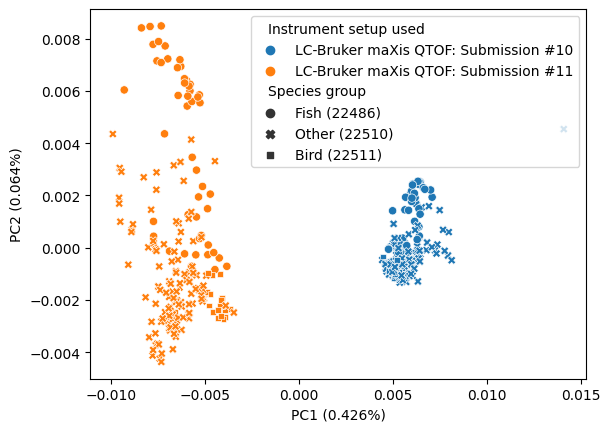

In [35]:
ax = sns.scatterplot(x='PC1',y='PC2',data=plotData, hue='Instrument setup used', style='Species group')
ax.set_xlabel(f'PC1 ({np.round(pca_model.explained_variance_ratio_[0],3)}%)')
ax.set_ylabel(f'PC2 ({np.round(pca_model.explained_variance_ratio_[1],3)}%)')